In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df = df.rename(columns={
    "Genre": "Gender",
    "Age": "Age",
    "Annual Income (k$)": "AIncome",
    "Spending Score (1-100)": "Spending_Score",
})

In [6]:
df.head()

,CustomerID,Gender,Age,AIncome,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,AIncome,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
AIncome           0
Spending_Score    0
dtype: int64

<BarContainer object of 200 artists>

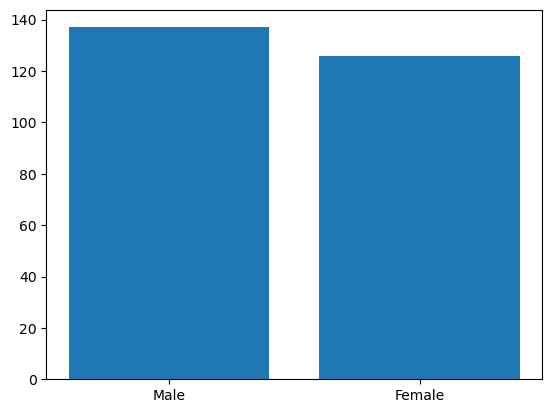

In [9]:
plt.bar(df["Gender"],df["AIncome"] )

<BarContainer object of 200 artists>

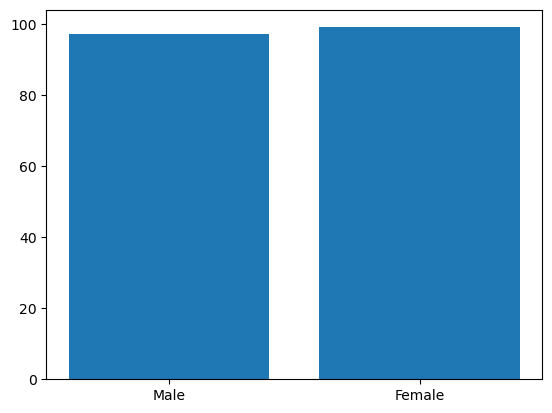

In [10]:
plt.bar(df["Gender"],df["Spending_Score"] )

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AIncome'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

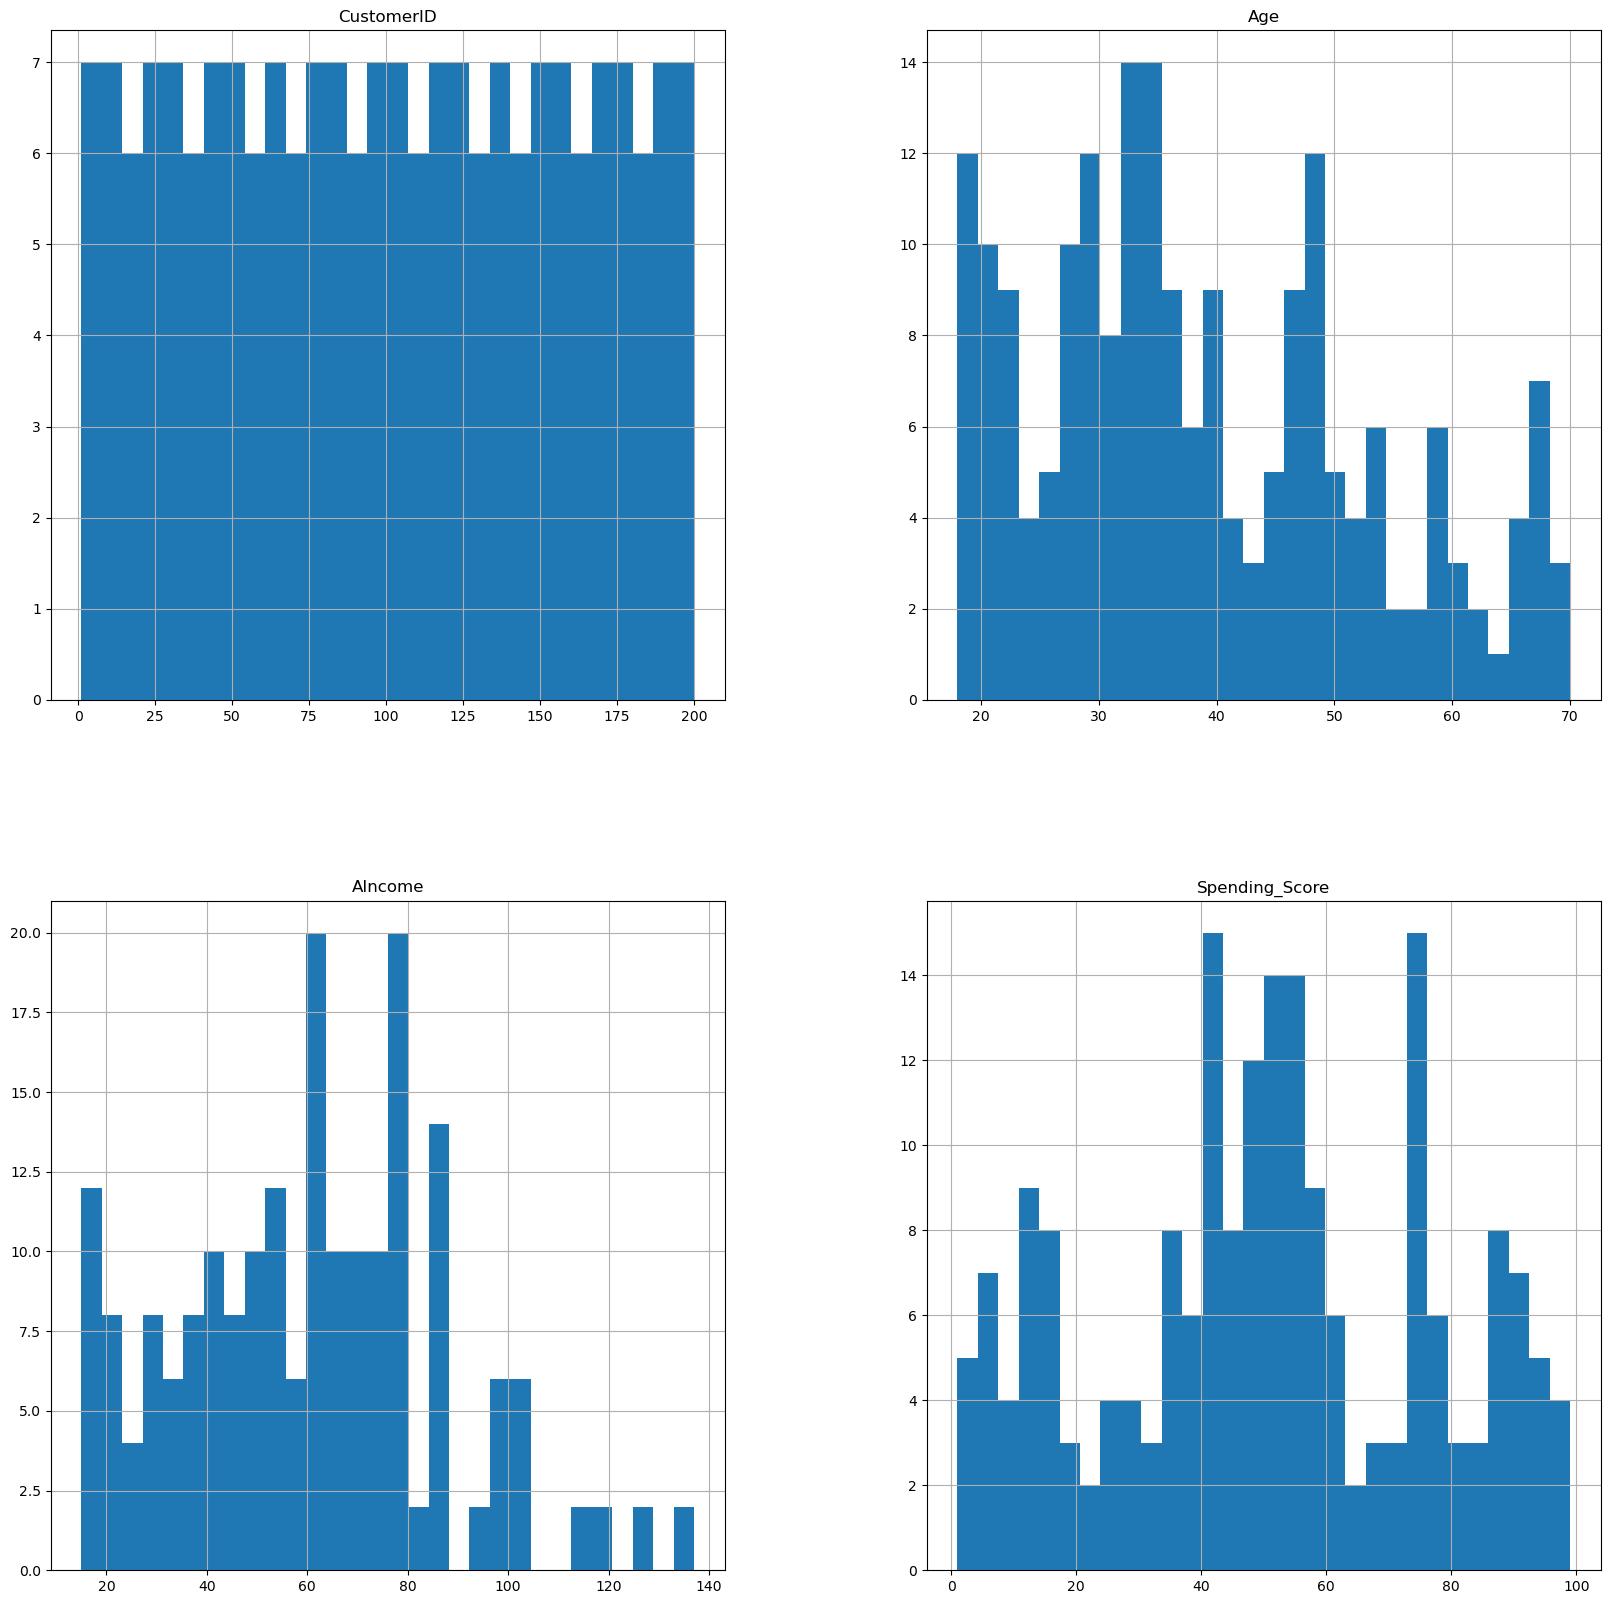

In [11]:
df.hist(bins=30, figsize=(20,20))

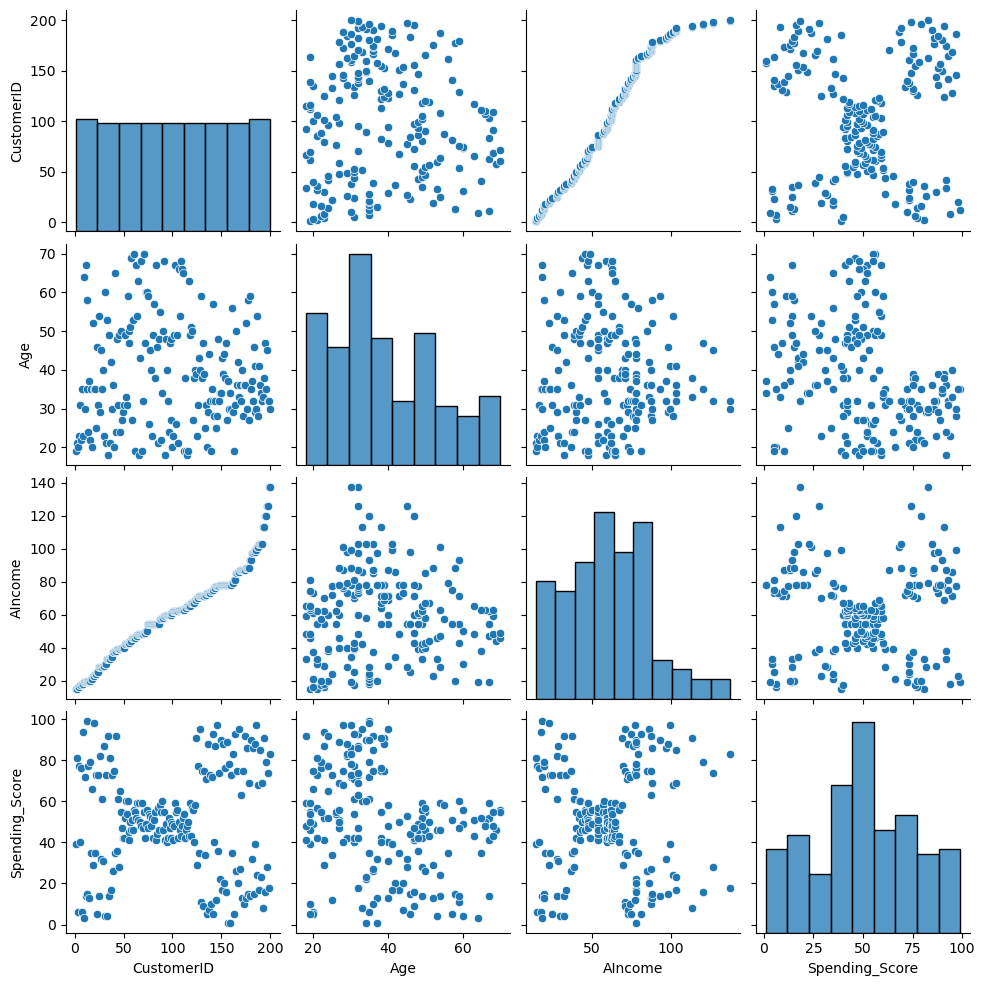

In [12]:
sns.pairplot(df)

In [13]:
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans

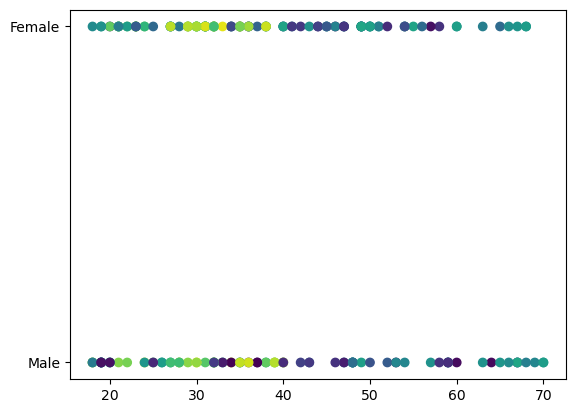

In [14]:
plt.scatter(df['Age'],df['Gender'], c=df['Spending_Score'])

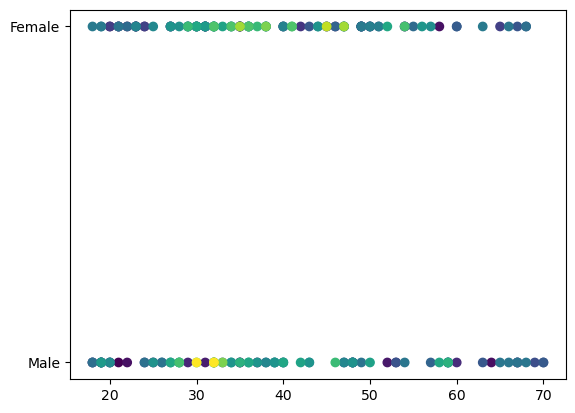

In [15]:
plt.scatter(df['Age'],df['Gender'], c=df['AIncome'])

In [16]:
correlation_matrix = pd.DataFrame(df.corr())
print("Correlation matrix between features : \n")
print(correlation_matrix)
print()
print("Correlation between features and spending scores : \n")
corr = pd.DataFrame(df.corr()['Spending_Score'])
print(corr)

Correlation matrix between features : 

                CustomerID       Age   AIncome  Spending_Score
CustomerID        1.000000 -0.026763  0.977548        0.013835
Age              -0.026763  1.000000 -0.012398       -0.327227
AIncome           0.977548 -0.012398  1.000000        0.009903
Spending_Score    0.013835 -0.327227  0.009903        1.000000

Correlation between features and spending scores : 

                Spending_Score
CustomerID            0.013835
Age                  -0.327227
AIncome               0.009903
Spending_Score        1.000000


In [17]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['AIncome','Spending_Score']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,AIncome,Spending_Score,Spending and Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


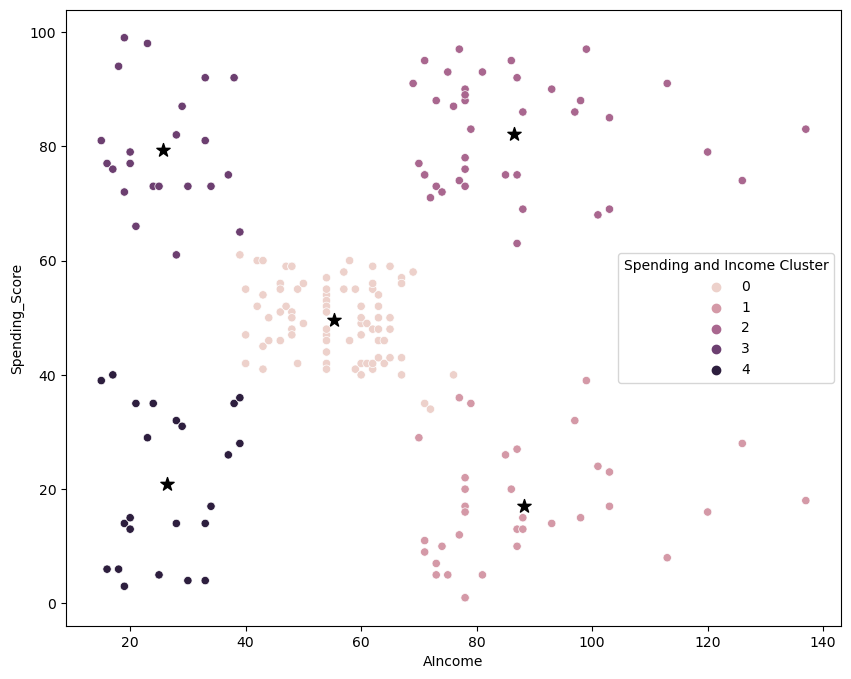

In [18]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='AIncome',y='Spending_Score',hue='Spending and Income Cluster')
plt.savefig('clustering_bivaraiate.png')